In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter,FormatStrFormatter
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
#read json
portfolio = pd.read_json(r'C:\Desktop\portfolio.json', orient='records', lines=True)
profile = pd.read_json(r'C:\Desktop\profile.json', orient='records', lines=True)
transcript = pd.read_json(r'C:\Desktop\transcript.json', orient='records', lines=True)

In [3]:
df=pd.DataFrame(transcript['value'].values.tolist(),index=transcript.index)

In [4]:
transcript=transcript.merge(df,left_index=True, right_index=True)

In [5]:
#one hot encode channels
mlb = MultiLabelBinarizer()
channel = pd.DataFrame(mlb.fit_transform(portfolio['channels']),columns=mlb.classes_, index=portfolio.index)

In [6]:
portfolio=portfolio.merge(channel,left_index=True, right_index=True)

In [7]:
transcript=transcript.merge(portfolio, left_on='offer_id', right_on='id', how='left')

In [8]:
transcript=transcript.merge(profile, left_on='person', right_on='id', how='left')

In [9]:
agg = (transcript.groupby(['age', 'person'])
         .agg({'person': 'nunique'})
      )
agg.groupby('age')['person'].count()

age
18       70
19      135
20      135
21      140
22      131
       ... 
98        5
99        5
100      12
101       5
118    2175
Name: person, Length: 85, dtype: int64

In [10]:
#Link: https://medium.datadriveninvestor.com/how-to-decide-on-the-number-of-bins-of-a-histogram-3c36dc5b1cd8
#bin count by Sturges Rule: Sturges' formula: K = log2 N + 1.
#will not count users with age 118 because they omitted age, gender, or income

int(np.ceil(np.log2(17000-2175)) + 1)
#filter out age 118 because it is an imputation for users with no gender,age, or income, which would not help with
#inferring how much an age group spends

15

In [11]:
tran=transcript.groupby('age')['amount'].sum()/agg.groupby('age')['person'].count()
avg_spend_by_age=pd.DataFrame(tran).reset_index()
avg_spend_by_age.columns =['age','avg_dollars_spent']
avg_spend_by_age=avg_spend_by_age[avg_spend_by_age['age']!=118] 
#filter out age 118 because it is an imputation for users with no gender,age, or income, which would not help with
#inferring how much an age group spends

In [12]:
bins= [18,24,29,35,40,46,51,57,62,68,73,79,84,90,95,101]
labels = ['18-23','24-28','29-34','35-39','40-45','45-50','51-56',\
          '57-61','62-67','68-72','73-78','79-83','84-89','90-94','95-101']
avg_spend_by_age['age_group']=pd.cut(avg_spend_by_age['age'], bins=15, labels=labels,
                                     right=False)


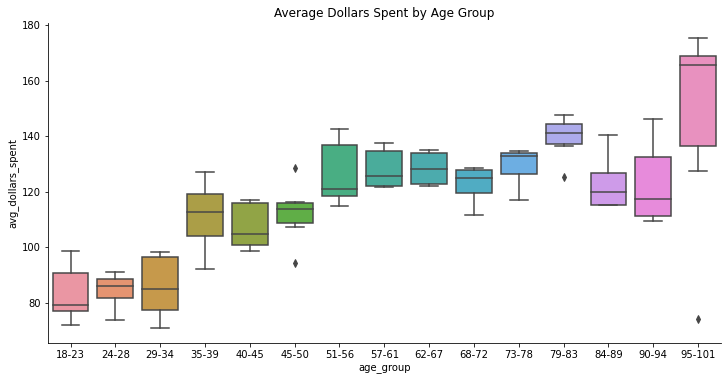

In [13]:
sns.catplot(data=avg_spend_by_age, x="age_group", y="avg_dollars_spent",kind='box', height=5, aspect=2)
plt.title("Average Dollars Spent by Age Group")
plt.show()